# Returning the Best Dataset Settings for our Experiments

---


In [10]:
!pip install optuna

In [11]:
import sys  
sys.path.insert(0, '/content/drive/MyDrive/overoptimism')

We now just reload our three studys from the results folder and we can easily checkout the best values / parameters

In [55]:
import optuna

study_name_1 = 'two_moons_2'
two_moons_study = optuna.create_study(study_name=study_name_1, storage=f'sqlite:///drive/MyDrive/overoptimism/results/{study_name_1}.db', load_if_exists=True, direction='maximize')


study_name_2 = 'den_blobs'
blobs_study = optuna.create_study(study_name=study_name_2, storage=f'sqlite:///drive/MyDrive/overoptimism/results/{study_name_2}.db', load_if_exists=True, direction='maximize')


study_name_3 = 'rings_2'
ring_study = optuna.create_study(study_name='rings', storage=f'sqlite:///drive/MyDrive/overoptimism/results/{study_name_3}.db', load_if_exists=True, direction='maximize')

[I 2021-05-13 15:30:24,613] Using an existing study with name 'two_moons_2' instead of creating a new one.
[I 2021-05-13 15:30:24,696] Using an existing study with name 'den_blobs' instead of creating a new one.
[I 2021-05-13 15:30:24,781] Using an existing study with name 'rings' instead of creating a new one.


Now we can load our best value (Best AMI of Rock - Mean Best AMI of competing algorithms) und params, though in order to have more discrete parameter values (to reflect the idea of an actual researcher overoptimizing their algorithm) to create the dataset jitter is actually multiplied by 0.01 and n_samples by 1000



In [13]:
print(two_moons_study.best_value)
print(two_moons_study.best_params)
moons_jitter = two_moons_study.best_params['jitter'] * 0.01
moons_samples = two_moons_study.best_params['n_samples'] * 100

0.3580777415846453
{'jitter': 15, 'n_samples': 10}


In [61]:
# jitter does not matter here since it is not used for the generation of blobs
print(blobs_study.best_value)
print(blobs_study.best_params)
print(blobs_study.best_trial)
blobs_features = blobs_study.best_params['n_features']
blobs_samples = blobs_study.best_params['n_samples'] * 100
blobs_centers = blobs_study.best_params['n_centers']

0.15813473004802003
{'jitter': 15, 'n_centers': 2, 'n_features': 4, 'n_samples': 11}
FrozenTrial(number=94, values=[0.15813473004802003], datetime_start=datetime.datetime(2021, 4, 27, 18, 16, 49, 232984), datetime_complete=datetime.datetime(2021, 4, 27, 18, 18, 1, 520486), params={'jitter': 15, 'n_centers': 2, 'n_features': 4, 'n_samples': 11}, distributions={'jitter': IntUniformDistribution(high=20, low=1, step=1), 'n_centers': IntUniformDistribution(high=10, low=2, step=1), 'n_features': IntUniformDistribution(high=20, low=2, step=1), 'n_samples': IntUniformDistribution(high=16, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=95, state=TrialState.COMPLETE, value=None)


In [62]:
print(ring_study.best_value)
print(ring_study.best_params)
print(ring_study.best_trial)
ring_jitter = ring_study.best_params['jitter'] * 0.01
ring_samples = ring_study.best_params['n_samples'] * 100

0.1842409415764952
{'factor': 9, 'jitter': 2, 'n_samples': 10}
FrozenTrial(number=52, values=[0.1842409415764952], datetime_start=datetime.datetime(2021, 5, 13, 13, 14, 30, 174606), datetime_complete=datetime.datetime(2021, 5, 13, 13, 15, 11, 120991), params={'factor': 9, 'jitter': 2, 'n_samples': 10}, distributions={'factor': IntUniformDistribution(high=9, low=1, step=1), 'jitter': IntUniformDistribution(high=20, low=1, step=1), 'n_samples': IntUniformDistribution(high=16, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=53, state=TrialState.COMPLETE, value=None)


Now we can reconstruct an example from each of these trials (10 runs with different random seed per trial)

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons

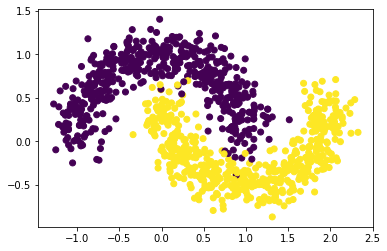

In [23]:
X, y = make_moons(n_samples=moons_samples, shuffle=True, noise=moons_jitter, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('two_moons_example.png')

In [19]:
import numpy as np
def getBlobDensities(n_centers):
  return np.round([3/n_centers * x for x in range(1, n_centers + 1)], decimals=2)

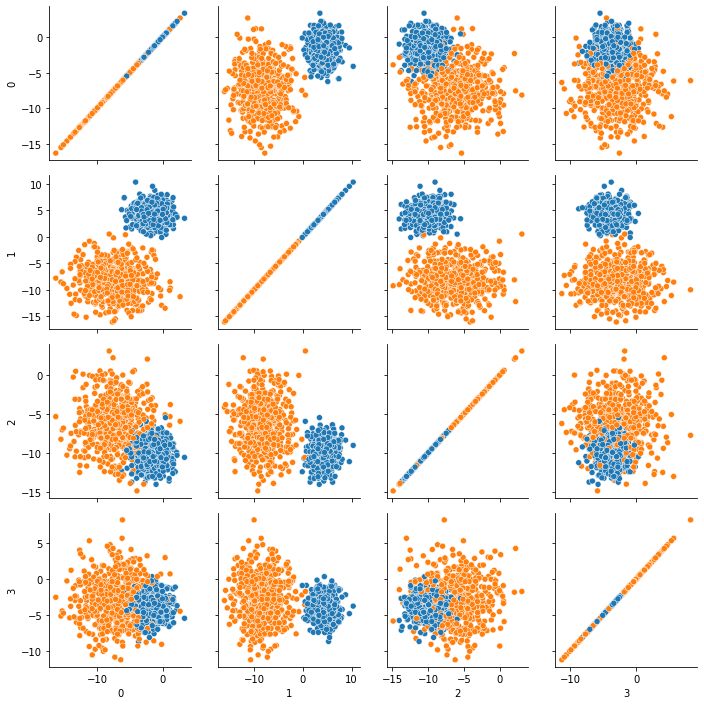

In [63]:
import seaborn as sns
import pandas as pd

X, y = make_blobs(n_samples=blobs_samples, centers=blobs_centers, n_features=blobs_features, cluster_std=getBlobDensities(blobs_centers), random_state=1)
blobs = pd.DataFrame(X)
blobs['cluster'] = y
g = sns.PairGrid(blobs, hue='cluster')
g.map(sns.scatterplot)

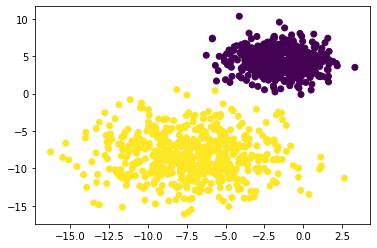

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('blobs_example.png')

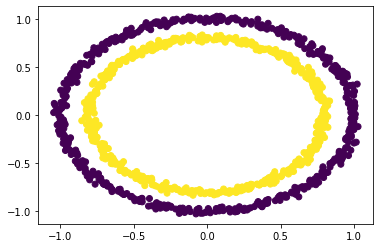

In [65]:
X, y = make_circles(n_samples=ring_samples, shuffle=True, noise=ring_jitter, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('rings_example.png')

Now we can look at the course of the optimizations themselves


In [59]:
df1 = two_moons_study.trials_dataframe(attrs=("number", "value", "params", "state"))
df2 = blobs_study.trials_dataframe(attrs=("number", "value", "params", "state"))
df3 = ring_study.trials_dataframe(attrs=("number", "value", "params", "state"))

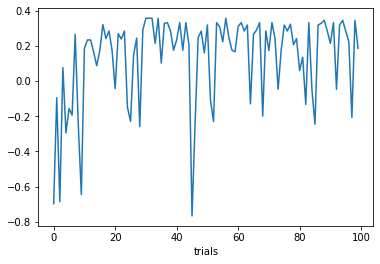

In [68]:
df1['value'].plot()
plt.xlabel('trials')
plt.savefig('moons_verlauf.png')

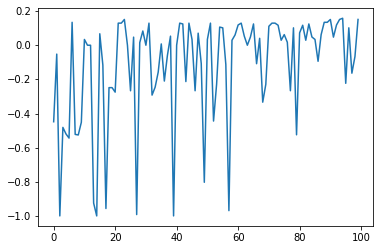

In [49]:
df2['value'].plot()
plt.savefig('blobs_verlauf.png')

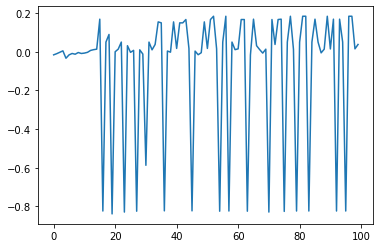

In [60]:
df3['value'].plot()